5451.605481499834
14
14
2336.4023492142146
14
14
2456.1922592339456
5
14
1502.954586150572
4
14


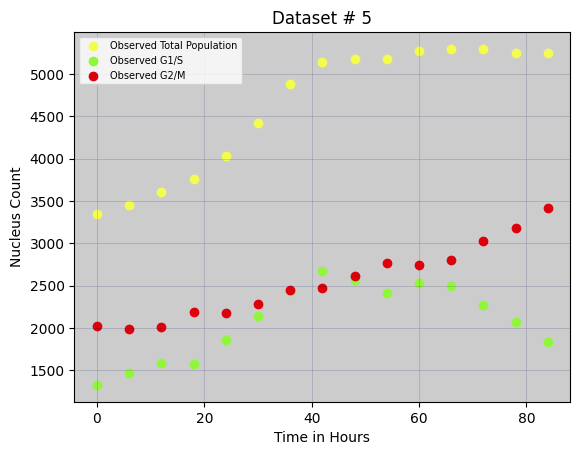

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.optimize import basinhopping
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import math
from scipy.optimize import root_scalar
from scipy.optimize import NonlinearConstraint

A = list()
B = list()
#generate a logistic growth curve to test the fitting algorithm
def logistic_growth(t, K, A, r):
    """ Logistic growth function.
    Args:
        t (list): Time points.
        K (float): Carrying capacity.
        A (float): Parameter related to initial population.
        r (float): Growth rate.
    Returns:
        list: Population at given time points. """
    return K / (1 +np.float64(A) * np.exp(-r * np.float64(t)))

def Gomp_growth(t, K, N_0, r):
    #Gompertzian growth function
    return K*np.exp(np.log(N_0/K)*np.exp(-r*np.float64(t)))

def GompEx_growth(t, K, N_0, r, a):
    #Gompertzian growth function
    #Wheldon TE (1988). Mathematical Models in Cancer Research. Bristol: Adam Hilger. ISBN 0-85274-291-6
    N_c = K*np.exp(-a/r)
    print(N_c)
    Nexp = N_0*np.exp(a*np.float64(t))
    NGomp = K*np.exp(np.log(N_0/K)*np.exp(-r*np.float64(t)))
    #construct N(t) with elements below N_c with expoential growth
    N_t = [x for x in Nexp if x < N_c]
    print(len(N_t))
    N_t[len(N_t):] = NGomp[len(N_t):]
    print(len(N_t))
    #print(NGomp)
    #print(N_t)
    return N_t

def modlogistic_growth(t, K, A, r):
    return (K/2) / (1 +np.float64(A) * np.exp(-r * np.float64(t))) + K/2

#0
A.append([np.float64(1565.5019164496136), np.float64(1650.603210796356), np.float64(2273.9821202819085), np.float64(2945.1022521364976), np.float64(3305.894463726113), np.float64(3976.4268948673985), np.float64(4502.688512608195), np.float64(4910.571983777649), np.float64(5558.703036775007), np.float64(5954.626015783286), np.float64(6337.858053780564), np.float64(6404.428609095438), np.float64(6495.329226134249), np.float64(6835.081737186041), np.float64(7077.770244493273)])
B.append([np.float64(1600.4980835503864), np.float64(1971.3967892036442), np.float64(2194.017879718091), np.float64(2268.8977478635024), np.float64(2319.105536273887), np.float64(2587.5731051326015), np.float64(2718.311487391805), np.float64(2809.428016222352), np.float64(2891.2969632249924), np.float64(3135.3739842167156), np.float64(3250.141946219436), np.float64(3418.5713909045617), np.float64(3416.67077386575), np.float64(3171.918262813959), np.float64(2942.229755506727)])
#1
A.append([np.float64(1698.1807350546555), np.float64(1842.2977454563172), np.float64(2477.0671938007895), np.float64(3181.301286429687), np.float64(3545.5943106289096), np.float64(4129.031862045344), np.float64(4675.027229800468), np.float64(5146.654650896011), np.float64(5575.228022835968), np.float64(5892.151683862253), np.float64(6217.192820579036), np.float64(6135.691153265037), np.float64(6556.932041319456), np.float64(6497.359084103348), np.float64(6393.623808913442)])
B.append([np.float64(1433.8192649453442), np.float64(1687.7022545436828), np.float64(1886.9328061992107), np.float64(1936.6987135703134), np.float64(1948.4056893710904), np.float64(2214.9681379546555), np.float64(2282.9727701995316), np.float64(2342.345349103989), np.float64(2471.771977164032), np.float64(2670.848316137746), np.float64(2759.8071794209623), np.float64(2856.308846734963), np.float64(2734.0679586805436), np.float64(2914.6409158966503), np.float64(3029.3761910865583)])
#2
A.append([np.float64(1326.3178380906215), np.float64(1517.6560976522114), np.float64(1797.6286397552594), np.float64(2033.871960381928), np.float64(2302.8560780087473), np.float64(2581.4763173854017), np.float64(2807.409045519246), np.float64(2980.126841697681), np.float64(3340.750284129781), np.float64(3560.229137808585), np.float64(3733.418625983378), np.float64(4031.6557537868084), np.float64(4381.259482357013), np.float64(4543.463732507704), np.float64(4667.242997661253)])
B.append([np.float64(1207.6821619093787), np.float64(1509.3439023477888), np.float64(1794.3713602447401), np.float64(1931.128039618072), np.float64(2168.1439219912522), np.float64(2336.5236826145983), np.float64(2531.5909544807537), np.float64(2660.873158302319), np.float64(2846.24971587022), np.float64(2982.770862191415), np.float64(3108.581374016621), np.float64(3231.3442462131916), np.float64(3344.7405176429875), np.float64(3269.536267492295), np.float64(3347.757002338747)])
#3
A.append([np.float64(110.7356789267013), np.float64(115.47130457596195), np.float64(150.25777424070722), np.float64(169.18923020055675), np.float64(209.6685054472622), np.float64(225.40135014777184), np.float64(263.61051054827885), np.float64(293.7187830592833), np.float64(320.5764917043185), np.float64(366.596994471432), np.float64(454.16354201682935), np.float64(580.6196034377026), np.float64(722.8072498839247), np.float64(833.4564463700057), np.float64(867.4949032454398)])
B.append([np.float64(519.2643210732987), np.float64(539.5286954240381), np.float64(577.7422257592928), np.float64(712.8107697994433), np.float64(734.3314945527378), np.float64(783.598649852228), np.float64(895.3894894517213), np.float64(1004.2812169407167), np.float64(1064.4235082956816), np.float64(1138.403005528568), np.float64(1172.8364579831707), np.float64(1317.3803965622976), np.float64(1276.192750116075), np.float64(1292.5435536299944), np.float64(1256.50509675456)])
#4
A.append([np.float64(1887.7207929536232), np.float64(2223.975188939359), np.float64(2916.5663472835963), np.float64(3370.550589353261), np.float64(3486.4463256201025), np.float64(4089.10643933727), np.float64(5166.351234665039), np.float64(5714.349025452006), np.float64(6518.430780187868), np.float64(7009.221716669602), np.float64(7711.844824445791), np.float64(8749.938771124314), np.float64(8632.603362058275), np.float64(8759.00757451948), np.float64(8507.67059560107)])
B.append([np.float64(1306.279207046377), np.float64(1636.024811060641), np.float64(1856.433652716404), np.float64(1913.4494106467394), np.float64(2332.553674379897), np.float64(2841.8935606627306), np.float64(2983.6487653349623), np.float64(3258.6509745479943), np.float64(3397.5692198121315), np.float64(3675.7782833303986), np.float64(3860.155175554211), np.float64(3969.0612288756865), np.float64(4274.396637941727), np.float64(4525.992425480519), np.float64(4778.32940439893)])
#5
A.append([np.float64(1325.7008278251985), np.float64(1468.1040963583623), np.float64(1589.9636977864682), np.float64(1574.7953131175484), np.float64(1861.37247284352), np.float64(2139.4956277440974), np.float64(2435.663326397258), np.float64(2677.2344111240313), np.float64(2567.4904625654503), np.float64(2410.4058205075944), np.float64(2525.680769583509), np.float64(2497.9416674947356), np.float64(2272.6548712573535), np.float64(2066.8457342593233), np.float64(1830.9204245611254)])
B.append([np.float64(2019.2991721748015), np.float64(1983.8959036416375), np.float64(2013.0363022135318), np.float64(2185.2046868824514), np.float64(2172.6275271564796), np.float64(2284.5043722559026), np.float64(2442.3366736027424), np.float64(2469.7655888759687), np.float64(2615.5095374345497), np.float64(2771.594179492406), np.float64(2746.3192304164904), np.float64(2800.0583325052644), np.float64(3023.3451287426465), np.float64(3179.1542657406767), np.float64(3417.0795754388746)])

#Generate artificial data to test the fitting algorithms:
#To do this, use a lower carrying capacity to simulated treated cells.
timepoints = [0,  6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 80]
#6
A.append(logistic_growth(timepoints, 7000, 2, 0.05))
B.append(logistic_growth(timepoints, 3000, 2, 0.05))
#7
A.append(logistic_growth(timepoints, 3000, 100, 0.1)) #K=3000, N_0=K/A = 3000/100 = 3
B.append(logistic_growth(timepoints, 2000, 100, 0.1))
#8
A.append(Gomp_growth(timepoints, 7000, 3000, 0.07))
B.append(Gomp_growth(timepoints, 3000, 1500, 0.07))
#9
A.append(Gomp_growth(timepoints, 3000, 70, 0.07))
B.append(Gomp_growth(timepoints, 2000, 30, 0.07))
#10
A.append(GompEx_growth(timepoints, 7000, 1500, 0.02, 0.005))
B.append(GompEx_growth(timepoints, 3000, 1000, 0.02, 0.005))
#11
A.append(GompEx_growth(timepoints, 3000, 1500, 0.1, 0.02))
B.append(GompEx_growth(timepoints, 2000, 1000, 0.07, 0.02))
#12
A.append(modlogistic_growth(timepoints, 7000, 100, 0.1))
B.append(modlogistic_growth(timepoints, 3000, 100, 0.1))
#13
A.append(modlogistic_growth(timepoints, 3000, 100, 0.1))
B.append(modlogistic_growth(timepoints, 2000, 100, 0.1))

### index 0 - Resistant control
### index 1 -  Resistant treated
### index 2 - intermediate control
### index 3 - intermediate treated
### index 4 - Sensitive control
### index 5 - Sensitive treated
### index 6 - artificial logistic growth control
### index 7 - artificial logistic growth treated
### index 8 - artificial Gompertzian growth control
### index 9 - artificial Gompertzian growth treated
### index 10 - artificial Gompertzian-Exponential growth control
### index 11 - artificial Gompertzian-Exponential growth treated
### index 12 - artificial modified logistic growth control
### index 13 - artificial modified logistic growth treated

dataset = 5
interval = 6
## B - G2M
## A - G1S
G1 = A[dataset]
G2 = B[dataset]
cell_count = np.array(G1) + np.array(G2)


#plot the data
tspan = np.arange(len(G1))*interval

fig, ax = plt.subplots()
plt.title(f"Dataset # {dataset}")
#plt.plot(sol.t, Y, label="Best fit with parameters: "+ f"\nβ = {round(beta,4)}, gamma = {round(gamma,5)}, delta = {round(delta,5)},G1(0) = {round(G1S_0)}, D(0) = {round(D_0)}, G2M(0) = {round(G2M_0)}, \nK = {K}, mu = {round(mu,4)}" , color = "green")
#plt.plot(sol.t, Y, label="Fitted Total Population" , color = '#F4FC4D')
ax.scatter(tspan,cell_count, label = "Observed Total Population",color = '#F4FC4D')
#ax.plot(sol.t,sol.y[0],label = "Fitted G1/S", color = "#91F63B")
ax.scatter(tspan,G1,label = "Observed G1/S", color = "#91F63B")
#ax.plot(sol.t,sol.y[1],label = "Fitted G2/M", color = "#DC010B")
ax.scatter(tspan,G2,label = "Observed G2/M", color = "#DC010B")

ax.set_facecolor('0.8')
plt.grid(True, color='#02005E',alpha=0.2, linestyle='-', linewidth=0.5) # draw grid for major ticks
plt.grid(which='minor',color = '#02005E', alpha=0.05)

plt.xlabel("Time in Hours")
plt.ylabel("Nucleus Count")
font_prop = font_manager.FontProperties(size=7)
plt.legend(prop=font_prop)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

Functions
=========

**DATA**

In [ ]:
def f(c):
    return (N_0/(dNdt[0])**2)*((1/B_0)*dNdt[0]*dB - dN2dt2[0]) - c*(N_0/K)**c/(1-(N_0/K)**c)

def rn(x):
    if x == 0:
        return 0
    return 10 ** math.floor(math.log10(abs(x)))

def f_S(t, U, K, mu, beta, gamma,delta,c1,c2):
    G1S,G2M, D, = U
    N = G1S + G2M

    if mortType == "A":
        #theta_a = gamma*np.log(t*(beta + mu) + 1.01)
        #theta_b = delta*np.log(t*(beta + mu) + 1.01)
        theta_a = gamma*(t**(beta+mu))
        theta_b = delta*(t**(mu+beta))
    elif mortType == "B":
        theta_a = gamma*t**(beta)
        theta_b = delta*t**(mu)
    elif mortType == "C":
        theta_a = gamma*np.exp((beta + mu)*t)
        theta_b = delta*np.exp((beta + mu)*t)
    elif mortType == "D":
        theta_a = gamma*np.exp(beta*t)
        theta_b = delta*np.exp(mu*t)
    elif mortType == "E": #Constant
        theta_a = gamma
        theta_b = delta

    # Interactions = Logistic
    if interType == "a":
        lambda_a = beta*(1-N/K)
        lambda_b = mu*(1-N/K)
        c1=1
    elif interType == "b":
        # Interactions = Gonpertzian Model
        lambda_a = -beta*np.log(N/K)
        lambda_b = -mu*np.log(N/K)
        c1=1
    elif interType == "c":
        # Interactions = Generalized Model
        lambda_a = beta*(1-(N/K)**c2)/c2
        lambda_b = mu*(1-(N/K)**c2)/c2
        c1=1
    elif interType == "d":
        # Interactions = Generalized Model
        lambda_a = beta*(1-(N/K)**c2)/c2
        lambda_b = mu*(1-(N/K)**c2)/c2
        #use input c1

    dG1Sdt = -lambda_a*G1S**c1 + 2*lambda_b*G2M - theta_a*G1S
    dG2Mdt = lambda_a*G1S**c1 - lambda_b*G2M - theta_b*G2M
    dDdt = theta_b*G2M + theta_a*G1S

    return [dG1Sdt,dG2Mdt,dDdt]

def event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2):

    t_cur = int(np.round(t/interval))
    if t_cur<(len(cell_count)-1):
        t_diff = cell_count[t_cur+1] - cell_count[t_cur]
    else:
        t_diff = 1
    if t_diff<= 0:
        return 0
    return 1

def SSE_meth(G1S_y,G2M_y):

    G1_t = np.array(G1)
    G2_t = np.array(G2)

    x1 = math.ceil(len(G1_t)/3)
    x2 = len(G1_t) - x1

    SSE1 = np.sum((G1S_y[:x1] - G1_t[:x1]) ** 2)
    SSE2 = np.sum((G2M_y[:x1] - G2_t[:x1]) ** 2)
    SSE3 = np.sum(((G1S_y[:x1] + G2M_y[:x1]) - cell_count[:x1]) ** 2)
    #SSE_a = SSE3 + SSE1*0.05
    SSE_a = SSE1 + SSE2*2 + SSE3

    SSE1 = np.sum((G1S_y[x1:x2] - G1_t[x1:x2]) ** 2)
    SSE2 = np.sum((G2M_y[x1:x2] - G2_t[x1:x2]) ** 2)
    SSE3 = np.sum(((G1S_y[x1:x2] + G2M_y[x1:x2]) - cell_count[x1:x2]) ** 2)
    #SSE_b = SSE3
    SSE_b = SSE1 + SSE2*2 + SSE3

    SSE1 = np.sum((G1S_y[x2:] - G1_t[x2:]) ** 2)
    SSE2 = np.sum((G2M_y[x2:] - G2_t[x2:]) ** 2)
    SSE3 = np.sum(((G1S_y[x2:] + G2M_y[x2:]) - cell_count[x2:]) ** 2)
    #SSE_c = SSE1*0.1 + SSE3
    SSE_c = SSE1 + SSE2*2 + SSE3
    #SSE = SSE_a/(x1-1)*len(G1_t)*4 + SSE_b/(len(G1_t)- x1 - 1)*len(G1_t)*0.5 + SSE_c/(x1-1)*len(G1_t)*4
    SSE = SSE_a + SSE_b + SSE_c
    return SSE

def SSE_meth_2(G1S_y,G2M_y):

    G1_t = np.array(G1)
    G2_t = np.array(G2)

    '''
    SSE1 = np.sum((G1S_y - G1_t) ** 2)
    SSE2 = np.sum((G2M_y - G2_t) ** 2)
    SSE3 = np.sum(((G1S_y + G2M_y) - cell_count) ** 2)
    '''
    NSSE1 = np.sum(((G1S_y - G1_t)/G1S_y) ** 2)
    NSSE2 = np.sum(((G2M_y - G2_t)/G2M_y) ** 2)
    NSSE3 = np.sum(( (G1S_y + G2M_y - cell_count)/(G1S_y + G2M_y) ) ** 2)
    NSSE = NSSE1 + NSSE2 + NSSE3
    #SSE = NSSE1*0.5 + NSSE2*0.5 + NSSE3*2
    return NSSE

def drive_1(params):
    K, mu,beta, gamma,delta, G1S_0,G2M_0,D_0 = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,c1,c2,c3),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-6, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_2(params):
    K, mu,beta, gamma,delta = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,c1,c2,c3),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-6, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_0(params):
    mu,beta, gamma,delta = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,c1,c2,c3),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-6, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_7(params):
    mu,beta, gamma,delta, G1S_0,G2M_0,D_0 = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-6, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_3(params):
    K, mu,beta, gamma,delta, G1S_0,G2M_0,D_0,c1,c2 = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu,beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-8,atol = 1e-8, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_4(params):
    K, mu,beta, gamma,delta,c1,c2 = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu,beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-8, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_5(params):
    mu,beta, gamma,delta,c1,c2 = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu,beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-6, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_6(params):
    mu,beta, gamma,delta,G1S_0,G2M_0,D_0,c1,c2 = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu,beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-8,atol = 1e-8, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)
def drive_8(params):
    K, mu,beta, gamma,delta,G1S_0,G2M_0,D_0,c1,c2 = params
    y0 = [G1S_0,G2M_0,D_0]
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu,beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-8,atol = 1e-8, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    return SSE_meth_2(G1S_y,G2M_y)

def initialize_mortality_rates(c1,c2):
    if(mortType == "L"):
        #delta = 1
        delta = 10**(-1)
        gamma = 10**(-1)
        #dN = (cell_count[1] - cell_count[0])/interval
        #dB = (G2[1] - G2[0])/interval
        #dA = (G1[1] - G1[0])/interval
        if dN < 0:
          gamma = np.min([G1S_0,G2M_0])/np.max([G1S_0,G2M_0])*(mu/c1)
        print("gamma",gamma)
        print("mu",mu)
    elif(mortType == "B"):
        gamma = 10**(-5)
        delta = 10**(-5)
    elif(mortType == "C"):
        gamma = 10**(-13)
        delta = 10**(-13)
    elif(mortType == "D"):
        gamma = 10**(-5) #Sensitive
        delta = 10**(-5) #Sensitive
        gamma = 10**(-4) #Intermediate
        delta = 10**(-4) #Intermediate
    elif(mortType == "E"):
        gamma = 10**(-1) #Sensitive
        delta = 10**(-1) #Sensitive
        gamma = 10**(-1) #Intermediate
        delta = 10**(-1) #Intermediate
    elif(mortType == "A"):
        coeff = (dA +2*dB)*c2*(1-(N_0/K)**c2)**(-1)
        def system(vars):
            beta, c1 = vars
            return [(G1[0]**c1)*beta - coeff]

        # Initial guess
        guess = [mu,0.5]
        a = 1e-20
        b = 1
        bounds = [(a, b), (a, b)]

        if not(c2 < 0.1):
            s_term = c2*(1-(cell_count[0]/K)**c2)**(-1)
            constraint1 = {'type': 'ineq', 'fun': lambda vars: 2*mu*G2[0]-vars[0]*G1[0]**vars[1]-dA*s_term}
            constraint1  = NonlinearConstraint(lambda vars: vars[0]*G1[0]**vars[1] - (dA*s_term + 2*mu*G2[0]),0,np.inf)
            constraint2 = {'type': 'ineq', 'fun': lambda vars: -mu*G2[0]+vars[0]*G1[0]**vars[1]-dB*s_term}
            constraint2  = NonlinearConstraint(lambda vars:mu*G2[0] - (vars[0]*G1[0]**vars[1]+dB*s_term), 0, np.inf)
        else:
            s_term = np.log(cell_count[0]/K)**(-1)
            constraint1 = {'type': 'eq', 'fun': lambda vars: vars[0]*G1[0]**vars[1]- (dA*s_term + 2*mu*G2[0])}
            constraint2 = {'type': 'eq', 'fun': lambda vars: mu*G2[0]-(vars[0]*G1[0]**vars[1]+dB*s_term)}

        # Use trust-constr with bounds
        res = minimize(system, x0=guess, method='trust-constr', bounds=bounds, constraints=[constraint1,constraint2],options={'gtol': 1e-4, 'xtol': 1e-8,'maxiter': 10000,})

        beta = res.x[0]/10
        c1 = res.x[1]
        #c1 = 0.4

        i_h = 4
        f_t = (i_h*interval)**(mu+beta)
        dB_2 = (G2[i_h+1] - G2[i_h])/interval
        dA_2 = (G1[i_h+1] - G1[i_h])/interval
        N_h = cell_count[i_h]
        if c2 > 0.01:
            gamma = (1/f_t/G1[i_h])*((2*mu*G1[i_h]/c2)*(1-(N_h/K)**c2) - (beta*G1[i_h]**c1/c2)*(1-(N_h/K)**c2) - dA_2)
            delta = (1/f_t/G2[i_h])*((-mu*G1[i_h]/c2)*(1-(N_h/K)**c2) + (beta*G1[i_h]**c1/c2)*(1-(N_h/K)**c2) - dB_2)
        else:
            gamma = -(1/f_t/G1[i_h])*((2*mu*G2[i_h])*np.log(N_h/K) - (beta*G1[i_h]**c1)*np.log(N_h/K) + dA_2)
            delta = -(1/f_t/G2[i_h])*((-mu*G2[i_h])*np.log(N_h/K) + (beta*G1[i_h]**c1)*np.log(N_h/K) + dB_2)
            c2 = 0.01
        gamma = np.abs(gamma)
        delta = np.abs(delta)
    return gamma, delta

def setup(bnds):
    tag = [0,1,1] #control, optimize K
    if ("K" in fixedVar):
            #bnds = bnds[1:] #removed K from user input EW
            #tag[0] = 1
            tag = [1,0,1] #treated cells, keep K the same as before
    #optimize initial value for both control and treated cases
    #if ("pop" in fixedVar):
    #    #bnds = bnds[:-3]
    #tag[1] = 1
    #if interType == "d":
    #    #bnds.append((10**(-20),1)) #optimize c1
    #    #bnds.append((1,1)) #c1=1
    #    tag = [1,1,1]
    print("tag",tag)
    print("mu",mu)
    print("c2",c2)
    print("beta",beta)
    print("c1",c1)
    print("gamma",gamma)
    print("delta",delta)
    print("K",K)
    if(tag[0] and tag[1] and tag[2]):
        result = minimize(drive_5, [mu,beta, gamma,delta,c1,c2], method ='Nelder-Mead' ,bounds=bnds,tol=1e-8)
    elif(tag[2] and tag[1] and (not tag[0])):
        #print(tag)
        print('optimize parameters for control cells')
        #for control
        result = minimize(drive_8, [K, mu, beta, gamma,delta,G1S_0,G2M_0,D_0,c1,c2], method ='Nelder-Mead' ,bounds=bnds,tol=1e-8, options={'maxfev': 100000,'maxiter': 100000})
    elif(tag[2] and tag[0] and (not tag[1])):
        #print(tag)
        print('optimize parameters for treated cells')
        #Nelder-Mead method uses xatol and fatol
        result = minimize(drive_6, [mu,beta, gamma,delta,G1S_0,G2M_0,D_0,c1,c2], method ='Nelder-Mead',bounds=bnds, tol=1e-10,options={'maxfev': 100000,'maxiter': 100000,'fatol': 1e-10})
    elif(tag[2]):
        result = minimize(drive_3, [K, mu,beta, gamma,delta, G1S_0,G2M_0,D_0,c1,c2], method ='Nelder-Mead' ,bounds=bnds,tol=1e-8,options={'maxfev': 5000,'maxiter': 5000})
    elif(tag[1] and tag[0]):
        result = minimize(drive_0, [mu,beta, gamma,delta], method ='Nelder-Mead' ,bounds=bnds,tol=1e-8)
    elif(tag[1]):
        result = minimize(drive_2, [K, mu,beta, gamma,delta], method ='Nelder-Mead' ,bounds=bnds,tol=1e-8)
    elif(tag[0]):
        result = minimize(drive_7, [mu,beta, gamma,delta, G1S_0,G2M_0,D_0], method ='Nelder-Mead' ,bounds=bnds,tol=1e-8)
    else:
        result = minimize(drive_1, [K, mu,beta, gamma,delta, G1S_0,G2M_0,D_0], method ='Nelder-Mead' ,bounds=bnds,tol=1e-8)
    return result

# MAIN

mortType A
interType a
tag [0, 1, 1]
mu 0.11186750991062898
c2 1.0
beta 0.11582904881679687
c1 1.0
gamma 0
delta 0
K 13286.0
optimize parameters for control cells
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.1339102352436953
             x: [ 1.597e+04  1.049e-01  7.979e-02  0.000e+00  0.000e+00
                  1.841e+03  1.377e+03  0.000e+00  1.000e+00  1.000e+00]
           nit: 509
          nfev: 943
 final_simplex: (array([[ 1.597e+04,  1.049e-01, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.597e+04,  1.049e-01, ...,  1.000e+00,
                         1.000e+00],
                       ...,
                       [ 1.597e+04,  1.049e-01, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.597e+04,  1.049e-01, ...,  1.000e+00,
                         1.000e+00]]), array([ 1.339e-01,  1.339e-01,  1.339e-01,  1.339e-01,
                        1.339e

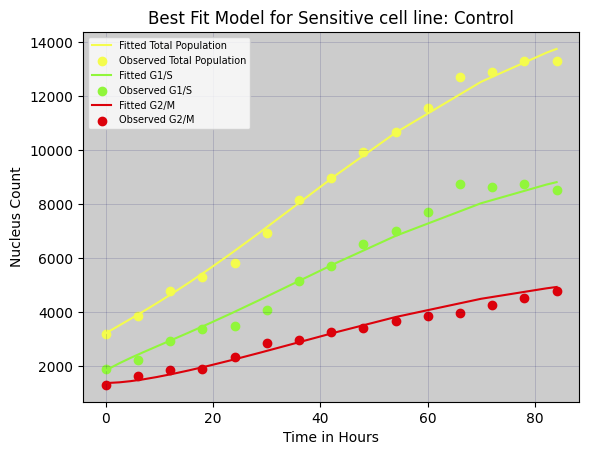

AIC
-77.25872119275
parameters
[1.59689194e+04 1.04924806e-01 7.97911973e-02 0.00000000e+00
 0.00000000e+00 1.84122731e+03 1.37736276e+03 0.00000000e+00
 1.00000000e+00 1.00000000e+00]
End



/usr/local/lib/python3.11/dist-packages/scipy/optimize/_trustregion_constr/equality_constrained_sqp.py:217: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  Z, LS, Y = projections(A, factorization_method)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
/usr/local/lib/python3.11/dist-packages/scipy/opti

tag [1, 0, 1]
mu 0.10492480642732188
c2 1.0
beta 0.07979119734299774
c1 1.0
gamma 0.06807938411316919
delta 0.03600470860204553
K 15968.919399479035
optimize parameters for treated cells
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.13965880047839552
             x: [ 5.578e-02  1.142e-01  0.000e+00  1.445e-02  1.263e+03
                  1.917e+03  0.000e+00  1.000e+00  1.000e+00]
           nit: 629
          nfev: 1153
 final_simplex: (array([[ 5.578e-02,  1.142e-01, ...,  1.000e+00,
                         1.000e+00],
                       [ 5.578e-02,  1.142e-01, ...,  1.000e+00,
                         1.000e+00],
                       ...,
                       [ 5.578e-02,  1.142e-01, ...,  1.000e+00,
                         1.000e+00],
                       [ 5.578e-02,  1.142e-01, ...,  1.000e+00,
                         1.000e+00]]), array([ 1.397e-01,  1.397e-01,  1.397e-01,  1.397e-01,
               

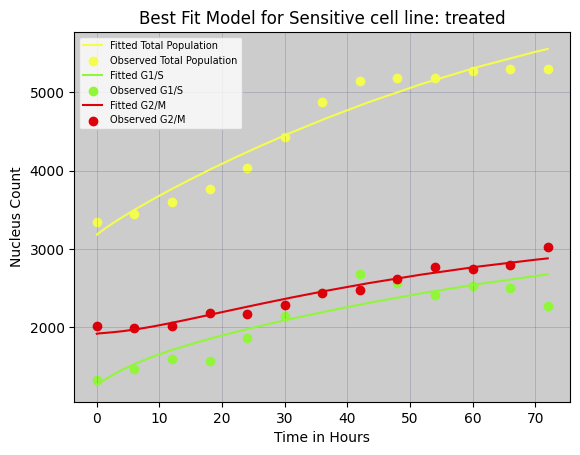

AIC
-61.217490015812004
parameters
[5.57828435e-02 1.14220780e-01 0.00000000e+00 1.44453123e-02
 1.26332013e+03 1.91715951e+03 0.00000000e+00 1.00000000e+00
 1.00000000e+00]
End



In [ ]:
event_threshold.terminal = True

mortType = "A"
#mortType "A" = power law with mu+beta, "B" = power law with indep. mu and beta
#mortType "C" = exp with mu+beta, "D" = exp with indep. mu and beta
#mortType "E" = constant
interType = "a"
#interType "a" = Logistic, "b" = Gompertzian and "c" = Generalized growth with c2
#interType "c" = Logistic with A^c1
interval = 6
print("mortType", mortType)
print("interType", interType)

### index 0 - Resistant control
### index 1 -  Resistant treated
### index 2 - intermediate control
### index 3 - intermediate treated
### index 4 - Sensitive control
### index 4 - Sensitive treated
## B - G2M
## A - G1S

interval = 6 # in terms of hours
#___________________________________________________________________________________
#User choose cell line input data here:
#cell_line="Resistant"
cell_line="Sensitive"
#cell_line="Intermediate"
if(cell_line == "Resistant"):
  #Resistant Control cell line
  G2 = B[0]
  G1 = A[0]
  # Initial values
  # EW lowered the intial values to improve the fit for the control unirradiated cells for resistant line%
  #G1S_0 = G1[0]#*0.85
  #G2M_0 = G2[0]#*0.9
  #D_0 = 0
elif(cell_line == "Sensitive"):
  #Sensitive Control cell line
  G2 = B[4]
  G1 = A[4]
  #G1S_0 = G1[0]
  #G2M_0 = G2[0]
  #D_0 = 0
elif(cell_line == "Intermediate"):
  G2 = B[2]
  G1 = A[2]
  #G1S_0 = G1[0]
  #G2M_0 = G2[0]
  #D_0 = 0

cell_count = np.array(G1) + np.array(G2)

#inital values
G1S_0 = G1[0]
G2M_0 = G2[0]
D_0 = 0 #dead cells
N_0 = cell_count[0]
B_0 = G2[0]
dB = (G2[1] - G2[0])/interval
dA = (G1[1] - G1[0])/interval
dN = (cell_count[1] - cell_count[0])/interval
tc_2 = list(cell_count[1:])
tc_2.append(cell_count[-1])
dNdt = list((np.array(tc_2)-cell_count)/interval)
dNdt_2 = dNdt[1:]
dNdt_2.append(dNdt[-1])
dN2dt2 = (np.array(dNdt_2)-np.array(dNdt))/interval

#Initial guesses
K  = np.max(cell_count)
c1=1.0
c2=1.0
#guess mu and beta growth rates
if dN > 0:
    #mu = c2/G2M_0*dN
    mu = (dNdt[0])*c2/G2[0]/(1-(N_0/K)**c2)
    beta1 = np.abs(dB + mu*G2M_0/c2)*c1/G1S_0
    beta2 = np.abs(2*mu*G2M_0/c2 - dA)*c1/G1S_0
    beta = (beta1 + beta2)/2
else:
    mu=0
    beta=0
#for the control cell line, set gamma and delta cell death to zero
gamma = 0
delta = 0

#K,mu,beta,gamma,delta,G1S_0,G2M_0, D_0, c1, c2 = fitted_params3
#for the control, keep the cell kill term zero, all growth is slowed due to carrying capacity
#bnds = [(1000,1e5),(0,1),(0, 1),(0, 1e-20),(0, 1e-20),(10,1e5),(10,1e5),(0,1e5)]
#bnds = [(1000,1e5),(0,10),(0, 10),(0, 1e-20),(0, 1e-20),(10,1e5),(10,1e5),(0,1e5)]
bnds_ctrl = [(1000,1e5),(0,50),(0, 50),(0, 0),(0, 0),(10,1e5),(10,1e5),(0,0),(1,1),(1,1)]
fixedVar = []
#fixedVar = ["K","pop"]
#fixedVar = ["pop"]
paramNum = 5 #K,mu, beta,G1S_0, G2M_0

tspan = np.arange(len(G1))*interval

result = setup(bnds_ctrl)
print(result)

SSE = result.fun/3/len(cell_count)
#if("pop" in fixedVar):
#    paramNum -= 3
#if("K" in fixedVar):
#    paramNum -= 1
#if("c" == interType):
#    paramNum += 2

AIC3 = 2*paramNum + len(cell_count)*np.log(SSE)
fitted_params3 = result.x
K,mu,beta,gamma, delta,G1S_0,G2M_0,D_0,c1,c2 = fitted_params3

y0 = [G1S_0,G2M_0,D_0]

t_2 = np.linspace(tspan[0],tspan[-1],1000)
fig, ax = plt.subplots()

sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, rtol = 1e-6, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))
print(result.x)
print(len(tspan))
Y = sol.y[1] + sol.y[0]
plt.title(f"Best Fit Model for {cell_line} cell line: Control")
#plt.plot(sol.t, Y, label="Best fit with parameters: "+ f"\nβ = {round(beta,4)}, gamma = {round(gamma,5)}, delta = {round(delta,5)},G1(0) = {round(G1S_0)}, D(0) = {round(D_0)}, G2M(0) = {round(G2M_0)}, \nK = {K}, mu = {round(mu,4)}" , color = "green")
plt.plot(sol.t, Y, label="Fitted Total Population" , color = '#F4FC4D')
plt.scatter(tspan,cell_count, label = "Observed Total Population",color = '#F4FC4D')

t_idk = tspan
ax.plot(sol.t,sol.y[0],label = "Fitted G1/S", color = "#91F63B")
ax.scatter(t_idk,G1,label = "Observed G1/S", color = "#91F63B")
ax.plot(sol.t,sol.y[1],label = "Fitted G2/M", color = "#DC010B")
ax.scatter(t_idk,G2,label = "Observed G2/M", color = "#DC010B")
#plt.plot(sol.t,sol.y[2],label = "D", color = "red")
#plt.scatter(t_idk,Q,label = "obs Q", color = "red")


ax.set_facecolor('0.8')
ax.grid(True, color='#02005E',alpha=0.2, linestyle='-', linewidth=0.5) # draw grid for major ticks
ax.grid(which='minor',color = '#02005E', alpha=0.05)

ax.set_xlabel("Time in Hours")
ax.set_ylabel("Nucleus Count")
font_prop = font_manager.FontProperties(size=7)
plt.legend(prop=font_prop)
plt.show()

print("AIC")
print(AIC3)
print("parameters")
print(fitted_params3)
print("End")
print("")

#__________________________________________________________
#Radiated cell lines

if(cell_line == "Resistant"):
  #Resistant Control cell line
  G2 = B[1]
  G1 = A[1]
elif(cell_line == "Sensitive"):
  #Sensitive Control cell line
  G2 = B[5][:-2]
  G1 = A[5][:-2]
elif(cell_line == "Intermediate"):
  G2 = B[3]
  G1 = A[3]


# Cell quantification Data is read in
cell_count = np.array(G1) + np.array(G2)

N_0 = cell_count[0]
B_0 = G2[0]
interval = 6
dB = (G2[1] - G2[0])/interval
dA = (G1[1] - G1[0])/interval
tc_2 = list(cell_count[1:])
tc_2.append(cell_count[-1])
dNdt = list((np.array(tc_2)-cell_count)/interval)
dNdt_2 = dNdt[1:]
dNdt_2.append(dNdt[-1])
dN2dt2 = (np.array(dNdt_2)-np.array(dNdt))/interval

#Initial Guesses
G1S_0 = G1[0]
G2M_0 = G2[0]
D_0 = 0
#Start with optimized control parameters:
K = fitted_params3[0]
mu = fitted_params3[1]
beta = fitted_params3[2]
gamma = fitted_params3[3]
delta = fitted_params3[4]
c1 = fitted_params3[8]
c2 = fitted_params3[9]

gamma, delta = initialize_mortality_rates(c1,c2)
#print("gamma",gamma)
#print("delta",delta)
#mu,beta,gamma, delta,G1S_0,G2M_0,D_0, (c1,c2)
#Treated
#bnds = [(1000,1e5),(0,50),(0, 50),(0, 10),(0, 10),(10,1e5),(10,1e5),(0,0)]
bnds_exp = [(0,50),(0, 50),(0, 10),(0, 10),(10,1e5),(10,1e5),(0,0),(1,1),(1,1)]
dB = (G2[1] - G2[0])/interval
dA = (G1[1] - G1[0])/interval
N_c = cell_count[0]
B_c = G2[0]

# User input Param
interval = 6 # in terms of hours
#fixedVar = ["K","pop"]
fixedVar = ["K"]
paramNum = 6

tspan = np.arange(len(G1))*interval

result = setup(bnds_exp)
print(result)

SSE = result.fun/3/len(cell_count)
#if("pop" in fixedVar):
#    paramNum -= 3
#if("K" in fixedVar):
#    paramNum -= 1
#if("c" == interType):
#    paramNum += 2

AIC3 = 2*paramNum + len(cell_count)*np.log(SSE)
fitted_params3 = result.x

mu,beta,gamma, delta,G1S_0,G2M_0,D_0,c1,c2 = fitted_params3

y0 = [G1S_0,G2M_0,D_0]

t_2 = np.linspace(tspan[0],tspan[-1],10000)
fig, ax = plt.subplots()

sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,c1,c2),[tspan[0], tspan[-1]], y0, rtol = 1e-6, events=lambda t, U: event_threshold(t, U, K, mu, beta, gamma,delta,c1,c2))

print(result.x)
print(len(tspan))
Y = sol.y[1] + sol.y[0]
plt.title(f"Best Fit Model for {cell_line} cell line: treated")
#plt.plot(sol.t, Y, label="Best fit with parameters: "+ f"\nβ = {round(beta,4)}, gamma = {round(gamma,5)}, delta = {round(delta,5)},G1(0) = {round(G1S_0)}, D(0) = {round(D_0)}, G2M(0) = {round(G2M_0)}, \nK = {K}, mu = {round(mu,4)}" , color = "green")
plt.plot(sol.t, Y, label="Fitted Total Population" , color = '#F4FC4D')
plt.scatter(tspan,cell_count, label = "Observed Total Population",color = '#F4FC4D')

t_idk = tspan
ax.plot(sol.t,sol.y[0],label = "Fitted G1/S", color = "#91F63B")
ax.scatter(t_idk,G1,label = "Observed G1/S", color = "#91F63B")
ax.plot(sol.t,sol.y[1],label = "Fitted G2/M", color = "#DC010B")
ax.scatter(t_idk,G2,label = "Observed G2/M", color = "#DC010B")


ax.set_facecolor('0.8')
ax.grid(True, color='#02005E',alpha=0.2, linestyle='-', linewidth=0.5) # draw grid for major ticks
ax.grid(which='minor',color = '#02005E', alpha=0.05)

ax.set_xlabel("Time in Hours")
ax.set_ylabel("Nucleus Count")
font_prop = font_manager.FontProperties(size=7)
plt.legend(prop=font_prop)
plt.show()

print("AIC")
print(AIC3)
print("parameters")
print(fitted_params3)
print("End")
print("")